In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["Housevalue"] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Housevalue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
X = housing.data
y = housing.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
print("Training samples : ", X_train.shape[0])
print("Testing samples : ", X_test.shape)

Training samples :  16512
Testing samples :  (4128, 8)


In [8]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

In [9]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Training RMSE : ", train_rmse)
print("Testing RMSE : ", test_rmse)

Training RMSE :  0.5106939011913575
Testing RMSE :  0.5422152016168362


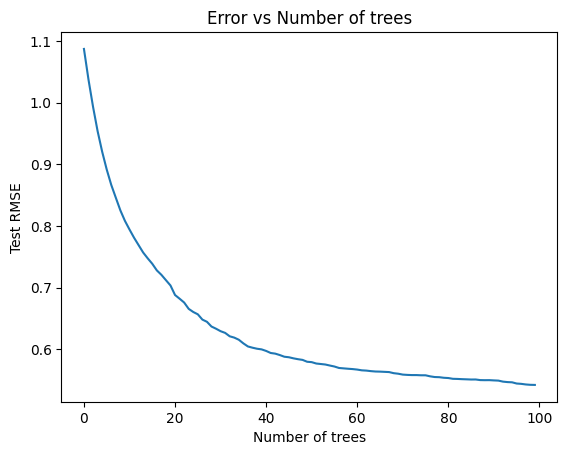

In [10]:
test_errors = []
for y_pred in gbr.staged_predict(X_test):
  test_errors.append(mean_squared_error(y_test, y_pred))
plt.plot(np.sqrt(test_errors))
plt.xlabel("Number of trees")
plt.ylabel("Test RMSE")
plt.title("Error vs Number of trees")
plt.show()

In [11]:
learning_rates = [0.3, 0.1, 0.01]
for lr in learning_rates :
  model = GradientBoostingRegressor(n_estimators=300, learning_rate=lr, max_depth=3, random_state=42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  print(f"Learning Rate : {lr} | Test RMSE : {rmse}")

Learning Rate : 0.3 | Test RMSE : 0.47998662888505694
Learning Rate : 0.1 | Test RMSE : 0.498678839478171
Learning Rate : 0.01 | Test RMSE : 0.6384827519319426


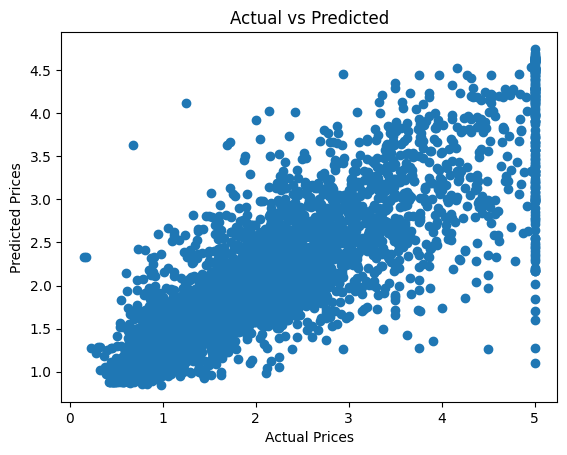

In [12]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

In [14]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8010752117483533


In [13]:
model = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.01, max_depth=3, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("LR=0.01, 2000 trees RMSE:", rmse)


LR=0.01, 2000 trees RMSE: 0.5105612877212957
